In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

In [106]:
data = pd.read_csv('DATA.csv') # importing our data

df = pd.DataFrame(data, columns=['MPG', 'Model Year']) # turning data into pandas dataframe

We make our Model Year as the x-axis because it has a natural ordering, therefore making it ideal for the x-axis

In [107]:
x = df['Model Year'] # Defining x and y axes
y = df['MPG']

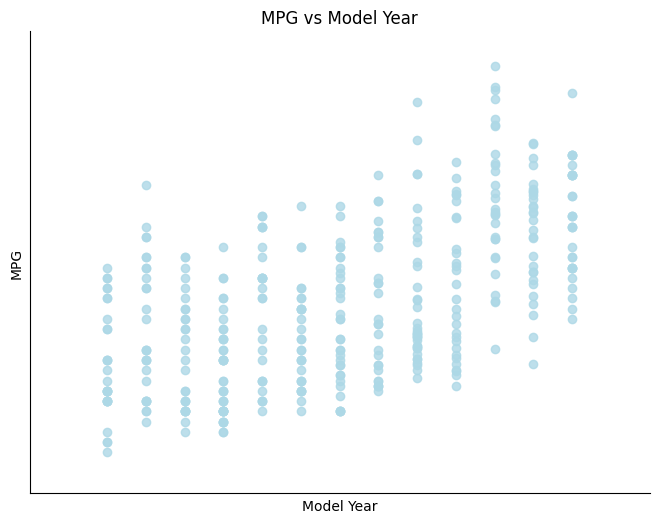

In [108]:

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.scatter(x,y,c='lightblue',alpha=.8) # creates our plot with x and y as our axes and defines our color

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines (the top and right border of our graph)
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

ax=plt.gca() # Gets current axes

ax.set_xlabel('Model Year') # Gives our axes a label
ax.set_ylabel('MPG')

plt.title('MPG vs Model Year')

plt.show()

We can see in the graph there seems to be a slight positive trend



<br>
We will now do additional correlation analysis

In [109]:
corr = x.corr(y,method='pearson') # Calculating a correlation coefficient
print(corr)

0.5792671330833096


We have a moderate positive correlation which indicates a linear relationship between our variables



<br>
We are now going to implement a Simple Linear Regression because we are predicting a relationship between two variables, therefore being the most appropriate

In [110]:
lm = LinearRegression() # creating object

fittedX = x.values.reshape(-1,1) # Reshaping so we can put in our fit function
fittedY = y.values

lm.fit(fittedX,fittedY) # fit our data

predicted_y = lm.predict(fittedX) # makes a y prediction for every x value


We now are using our graph from before and adding our linear regression line

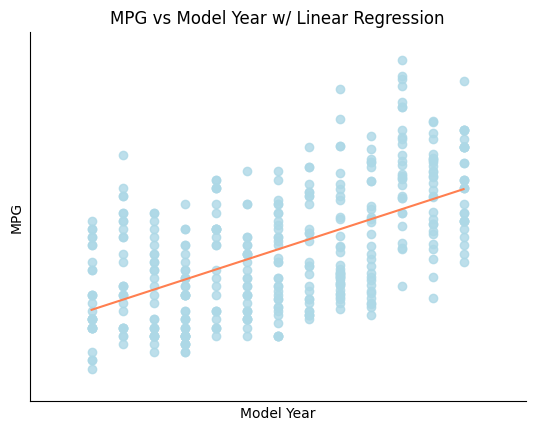

In [111]:

plt.scatter(x,y,c='lightblue',alpha=.8)

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

ax=plt.gca() # get current axes

ax.set_xlabel('Model Year') # Gives our axes a label
ax.set_ylabel('MPG')

plt.title('MPG vs Model Year w/ Linear Regression') # gives a plot title

plt.plot(fittedX, predicted_y,c='coral') # add the linear regression line

Analysis for our prediction (Not sure if needed or what methods we will use)


In [112]:
score = lm.score(fittedX,fittedY) # check our R-score 
print(score)

0.33555041147055686


We have a large R score, must make our model more accurate



<br>
We will investigate why this is the case first by checking for outliers

In [113]:
Q1 = y.quantile(0.25) # Calculate our quartiles
Q3 = y.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df[(y < lower) | (y > upper)] # search for outliers
print(outliers)

      MPG  Model Year
322  46.6          80


We have only one relatively small outlier in our dataset which shouldn't be responsible for our innacuracy 


<br>
We will investigate further methods

In [116]:
""" ridge = Ridge(alpha=1) # Creating Ride object

ridge.fit(fittedX,fittedY) # fitting our data

y_pred = ridge.predict(fittedX) # predicting our y values

r2 = r2_score(fittedY,y_pred) # calculate R^2 score
print(r2) """

0.3355504000857801


In [124]:
""" lm_coef = lm.coef_ # Calculating LinearRegression() coefficient

ridge_coef = ridge.coef_ # Calculating Ridge() coefficient

print(lm_coef,ridge_coef) """

[1.22444564] [1.2242201]


In [125]:
""" lm_mse = np.mean((fittedY - predicted_y) ** 2) # Calculating

ridge_mse = np.mean((fittedY-y_pred) ** 2)

print(lm_mse,ridge_mse) """

40.48897938876636 40.48898008251049
